In [11]:
!pip install tensorflow Keras NumPy Matplotlib

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Define image dimensions and other parameters
img_height, img_width = 48, 48
num_images = 16  # Number of images to display in the grid
grid_size = int(np.ceil(np.sqrt(num_images)))  # Grid dimensions

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = (img_array / 255.0) - 0.5
    return img_array

def predict_expression(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array, verbose=0)
    return prediction[0]

In [13]:
# Ask user to choose the .keras model file
model_directory = './models/'  # Change this to your model directory
keras_files = [f for f in os.listdir(model_directory) if f.endswith('.keras')]
print("Available .keras model files:")
for i, file in enumerate(keras_files):
    print(f"{i + 1}. {file}")
    
choice = int(input("Enter the number corresponding to the .keras file you want to load: ")) - 1
chosen_model_file = os.path.join(model_directory, keras_files[choice])

# Load the chosen model
loaded_model = tf.keras.models.load_model(chosen_model_file)

Available .keras model files:
1. cnn_expression_classification_model.keras
2. best_cnn_model.keras
3. sentiment_best_model.keras
4. expression_classification_model.keras


Enter the number corresponding to the .keras file you want to load:  1


In [14]:
# Print the model summary
print("\nModel Summary:")
loaded_model.summary()


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 44, 44, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,665,719 (6.35 MB)

 Trainable params: 554,599 (2.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 1,109,200 (4.23 MB)

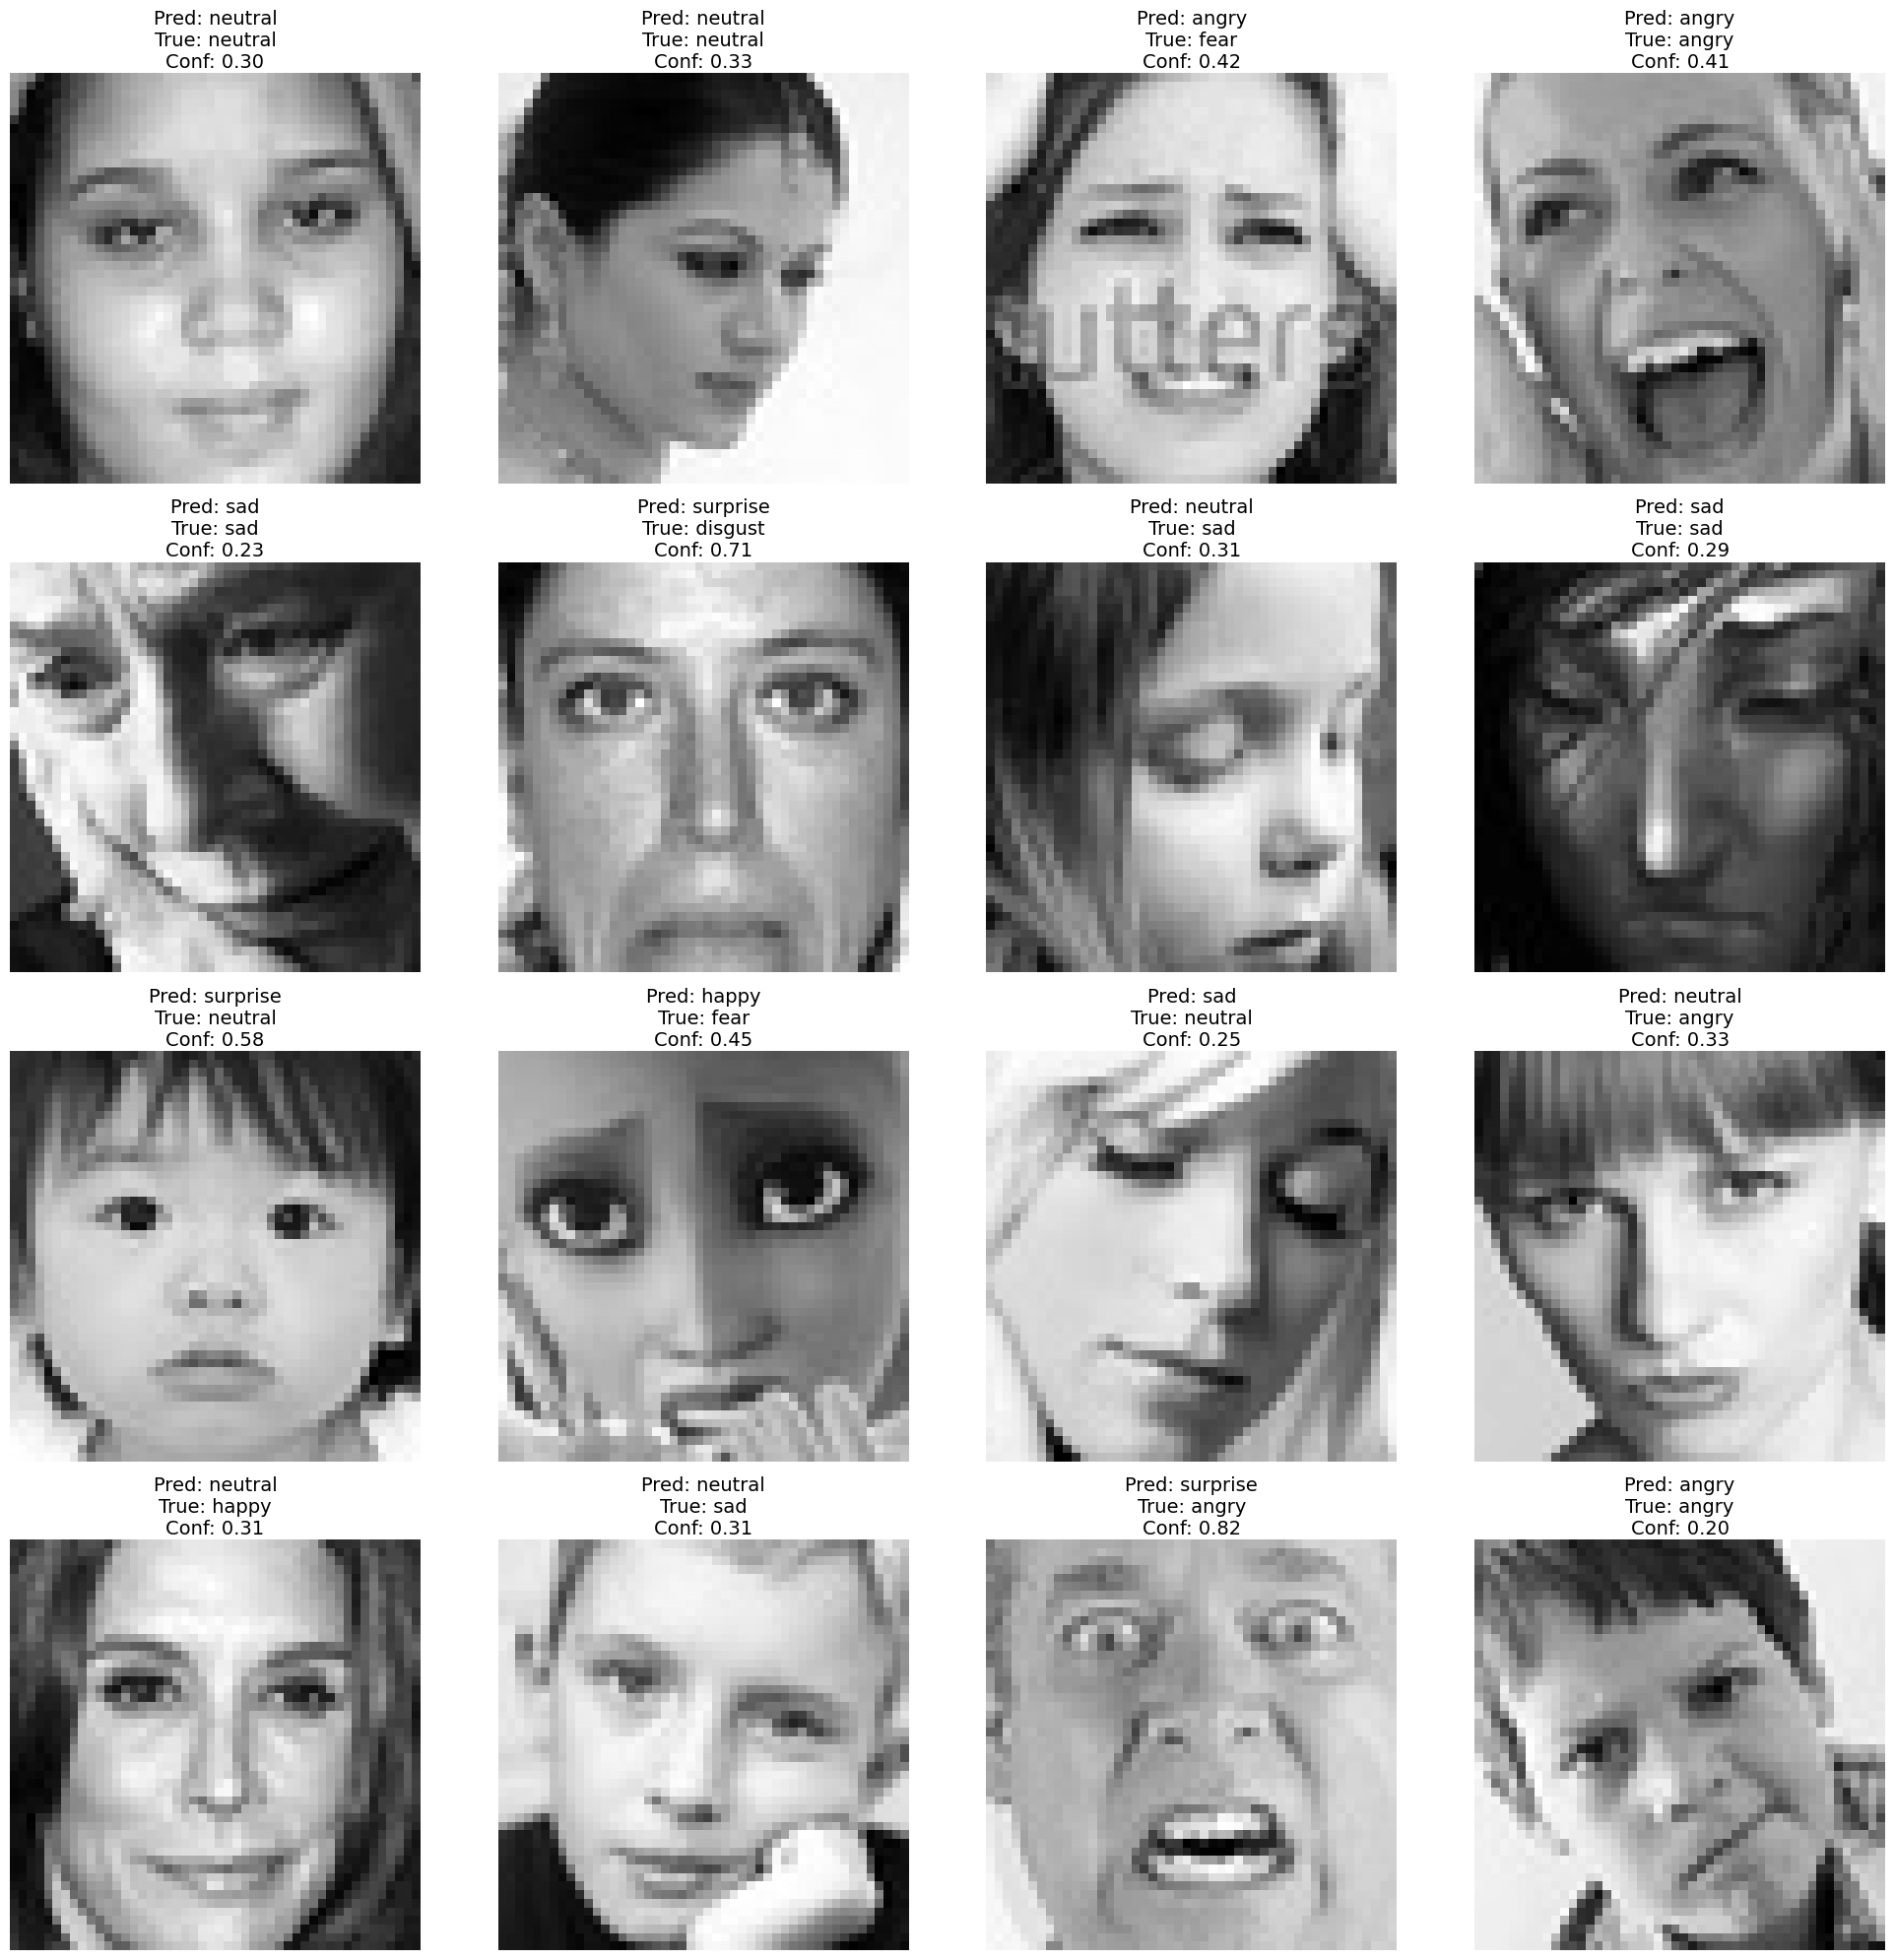

In [15]:
# Function to get multiple random image paths from the validation set
def get_random_image_paths(base_dir, num_images):
    image_paths = []
    true_categories = []
    categories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    
    for _ in range(num_images):
        random_category = random.choice(categories)
        category_path = os.path.join(base_dir, random_category)
        image_files = [f for f in os.listdir(category_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        random_image = random.choice(image_files)
        image_paths.append(os.path.join(category_path, random_image))
        true_categories.append(random_category)
    
    return image_paths, true_categories

# Get random images from the validation set
base_dir = './face-expression-recognition-dataset/images/images/validation/'
img_paths, true_categories = get_random_image_paths(base_dir, num_images)

# Make predictions
predictions = [predict_expression(img_path, loaded_model) for img_path in img_paths]

# Get the predicted classes
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
predicted_classes = [class_names[np.argmax(pred)] for pred in predictions]
confidences = [np.max(pred) for pred in predictions]

# Create a grid of subplots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 20))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        img = plt.imread(img_paths[i])
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(f"Pred: {predicted_classes[i]}\nTrue: {true_categories[i]}\nConf: {confidences[i]:.2f}", 
                     fontsize=14, wrap=True)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [16]:
# Print overall accuracy
accuracy = sum([pred == true for pred, true in zip(predicted_classes, true_categories)]) / num_images
print(f"\nOverall accuracy on {num_images} random images: {accuracy:.2f}")

# Print detailed results
print("\nDetailed Results:")
for i in range(num_images):
    print(f"Image {i+1}:")
    print(f"  True category: {true_categories[i]}")
    print(f"  Predicted category: {predicted_classes[i]}")
    print(f"  Confidence: {confidences[i]:.2f}")
    print(f"  Correct: {'Yes' if predicted_classes[i] == true_categories[i] else 'No'}")
    print()


Overall accuracy on 16 random images: 0.38

Detailed Results:
Image 1:
  True category: neutral
  Predicted category: neutral
  Confidence: 0.30
  Correct: Yes

Image 2:
  True category: neutral
  Predicted category: neutral
  Confidence: 0.33
  Correct: Yes

Image 3:
  True category: fear
  Predicted category: angry
  Confidence: 0.42
  Correct: No

Image 4:
  True category: angry
  Predicted category: angry
  Confidence: 0.41
  Correct: Yes

Image 5:
  True category: sad
  Predicted category: sad
  Confidence: 0.23
  Correct: Yes

Image 6:
  True category: disgust
  Predicted category: surprise
  Confidence: 0.71
  Correct: No

Image 7:
  True category: sad
  Predicted category: neutral
  Confidence: 0.31
  Correct: No

Image 8:
  True category: sad
  Predicted category: sad
  Confidence: 0.29
  Correct: Yes

Image 9:
  True category: neutral
  Predicted category: surprise
  Confidence: 0.58
  Correct: No

Image 10:
  True category: fear
  Predicted category: happy
  Confidence: 0.4